In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from src.model import dataset
from src.visualize.basic import plot_count, plot_dimension
from src.visualize.basic import plot_image_histogram, plot_t1_image, plot_t2_image, plot_batch_image
from src.utils import path as path_utils
from src.model import generator

2023-02-14 21:55:44.097496: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


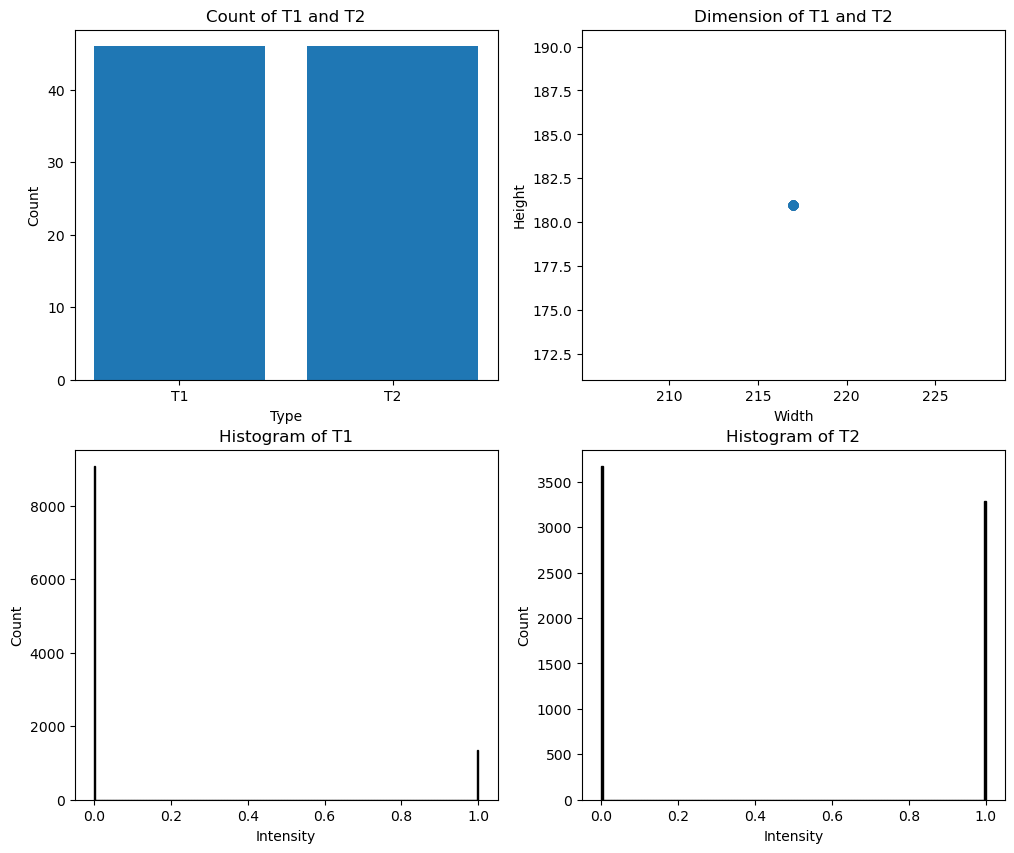

In [2]:
# sub plot for two plots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
# plot count
plot_count(ax1)
# plot dimension
plot_dimension(ax2)
# plot image histogram
plot_image_histogram(ax3, ax4)
# show plot
plt.show()

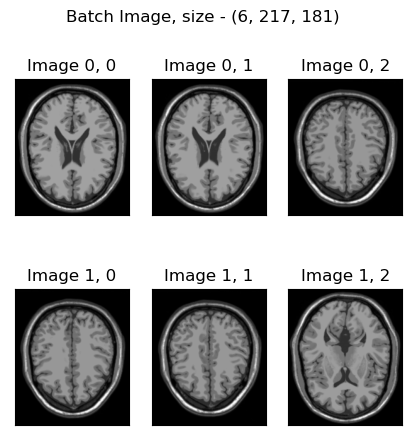

In [3]:
plot_t1_image()

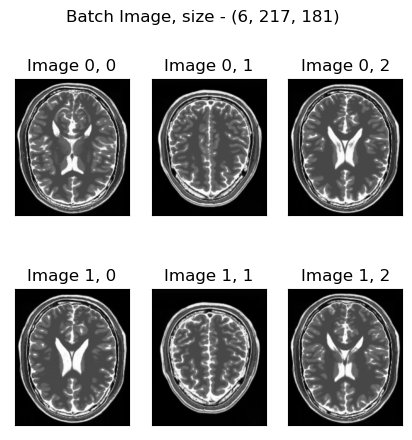

In [4]:
plot_t2_image()

In [5]:
train_dataset = dataset.load_dataset(
    x_paths=path_utils.T1_ALL_IMAGE_PATH,
    y_paths=path_utils.T2_ALL_IMAGE_PATH,
    batch_size=8,
    shuffle=True
)

2023-02-14 21:55:46.771595: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-14 21:55:46.771898: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
t1, t2 = next(iter(train_dataset))

In [7]:
t1.shape, t2.shape

(TensorShape([8, 256, 256, 1]), TensorShape([8, 256, 256, 1]))

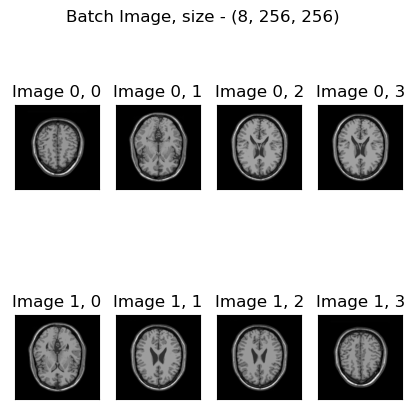

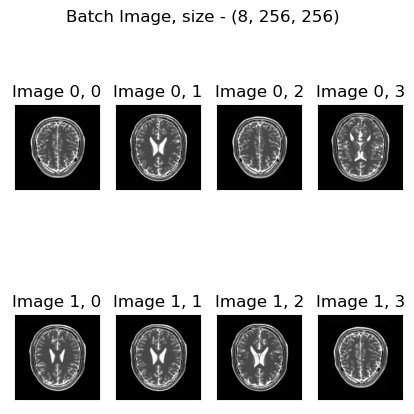

In [8]:
plot_batch_image(t1.numpy())
plot_batch_image(t2.numpy())

In [9]:
input_layer = tf.keras.layers.Input(shape=[256, 256, 1], name='input_layer')

In [10]:
generator = generator.Generator()

In [11]:
out_images = generator(t1, training=False)

(8, 1, 1, 1601)


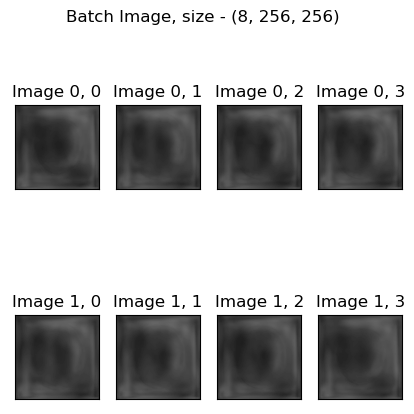

In [13]:
plot_batch_image(out_images.numpy())